In [1]:
from eval.trainVAE import VAEEval
v = VAEEval()

In [2]:
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN,Birch
from sklearn.metrics import calinski_harabasz_score

In [3]:
fe = v.feature_extractor
data = v.data_set.ext_df.tolist()
_pred = v.data_set.tag_ids.tolist()
ori = v.data_set.ori_df

In [4]:
v.data_set.ori_df.iloc[0,7]

"[('enables', 'you'), ('retrieve', 'a Frame.io authenticated user'), ('enables', 'teams'), ('add', 'a collaborator'), ('using', 'a GET/POST request'), ('supports', 'SSL'), ('requires', 'a Bearer Token'), ('provides', 'professional video review and collaboration support'), ('provides', 'video teams'), ('track', 'the creative process'), ('track', 'a single workbench'), ('built', 'real working video creators')]"

In [5]:
v.data_set.goal_ids[1]

KeyError: 1

In [2]:
v.query_ext([v.data_set.pos[1][0]])

[[361,
  521,
  5593,
  1159,
  240,
  1030,
  6363,
  4449,
  6371,
  6362,
  6359,
  6367,
  6360,
  6361,
  1378,
  361,
  6364,
  1500,
  423,
  944,
  1382,
  5593,
  6369,
  6368,
  361,
  4208,
  339,
  339,
  2384,
  6187,
  698,
  4393,
  1377,
  1253,
  414,
  4936,
  87,
  1344,
  93,
  353,
  50,
  2126,
  6366,
  361,
  4389,
  6370,
  2160,
  361,
  1378,
  4936,
  6365,
  4936,
  1067,
  100]]

In [ ]:
v.data_set.ext_df.iloc[0]

In [ ]:
v.data_set.raw_ids.iloc[0]

In [4]:
v.train()

epoch:0,loss:38485240.0
tensor(544.5253, device='cuda:0', grad_fn=<SumBackward0>)
epoch:1,loss:38484998.0
epoch:2,loss:38484981.5
epoch:3,loss:38484964.5
epoch:4,loss:38484963.5
epoch:5,loss:38484960.0
epoch:6,loss:38484958.5
epoch:7,loss:38484957.5
epoch:8,loss:38484957.5
epoch:9,loss:38484957.5
epoch:10,loss:38484957.5
tensor(547.6573, device='cuda:0', grad_fn=<SumBackward0>)
epoch:11,loss:38484957.5
epoch:12,loss:38484957.5
epoch:13,loss:38484957.5
epoch:14,loss:38484957.5
epoch:15,loss:38484957.5
epoch:16,loss:38484957.5
epoch:17,loss:38484957.5
epoch:18,loss:38484957.5
epoch:19,loss:38484957.5
epoch:20,loss:38484957.5
tensor(550.9846, device='cuda:0', grad_fn=<SumBackward0>)
epoch:21,loss:38484957.5
epoch:22,loss:38484957.5
epoch:23,loss:38484957.5
epoch:24,loss:38484957.5
epoch:25,loss:38484957.5
epoch:26,loss:38484957.5
epoch:27,loss:38484957.5
epoch:28,loss:38484957.5
epoch:29,loss:38484957.5
epoch:30,loss:38484957.5
tensor(546.9089, device='cuda:0', grad_fn=<SumBackward0>)
epo

In [5]:

# _,theta,*_ = fe(data,pred=_pred)
_,theta,*_ = fe(data)

In [6]:
def do_tsne(X):
    tsne = TSNE(n_components=2)
    new_x = tsne.fit_transform(X)
    return new_x,tsne

In [7]:
t,tsne = do_tsne(theta.cpu().detach())

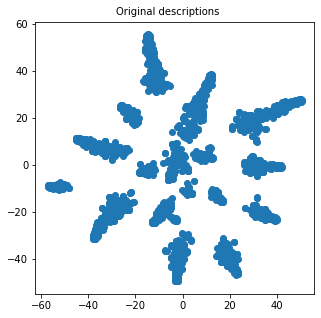

In [8]:
import matplotlib.pyplot as plt
fig = plt.figure('enriched',(5,5))
fig.text(0.35,0.9,'Original descriptions')
ax = fig.add_subplot(111)
ax.scatter(t[:,0],t[:,1])
fig.show()

In [10]:
from sklearn.cluster import KMeans,DBSCAN
km = KMeans()
db = DBSCAN()

In [ ]:
r1 = km.fit_predict(t)
r2 = db.fit_predict(theta.cpu().detach())

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure('enriched',(5,5))
fig.text(0.35,0.9,'Original descriptions')
ax = fig.add_subplot(111)
ax.scatter(t[:,0],t[:,1],c=r1)

fig.show()

In [ ]:
ori[r1==1]

In [ ]:
from eval.TagLSTMEval_topic import LSTMEval
model = LSTMEval()

In [ ]:
model.train()

In [ ]:
torch.autograd.set_grad_enabled(False)

for id1,id2,l in model.train_data_loader:
    break
in1 = model.get_BoWs(id1)    
in2 = model.ext_df[id2]
text2 = model.data_set[id2]

In [ ]:
positives = torch.sort(l,descending=True)[1]

In [ ]:
import torch
f1,w1 = model.feature_extractor([torch.LongTensor(s) for s in id1],in1,model.vae)

In [ ]:
k = positives[2].item()
w1[k]

In [ ]:
[model.di.id2token[_i] for _i in id1[k]]

In [ ]:
f2,w2 = model.feature_extractor(text2,in2,model.vae)

In [ ]:
[model.di.id2token[_i] for _i in text2.iloc[k].numpy().tolist()]

In [ ]:
word_mask = (w2[k]>0.5).squeeze()[:len(text2.iloc[k])]

In [ ]:
[model.di.id2token[_i] for _i in text2.iloc[k][word_mask].numpy().tolist()]

In [ ]:
model.cos(f1,f2)[k]

In [ ]:
for id1 in model.test_keys:
    break
pos = list(model.data_set.pos[id1][1])
text_bow = model.get_BoWs([model.data_set.pos[id1][0]])
text = [torch.LongTensor(model.data_set.pos[id1][0])]

In [ ]:
[model.di.id2token[_i] for _i in text[0].numpy()]

In [ ]:
all_f = []
for _ids in model.ids_loader:
    _t = model.data_set[_ids.cpu().numpy()]
#   _b = self.bow[_ids.cpu().numpy()]
    _b = model.ext_df[_ids.cpu().numpy()]
    _f,*_ = model.feature_extractor(_t,_b,model.vae)

    all_f.append(_f.cpu())
all_f = torch.cat(all_f,dim = 0).view(len(model.data_set),-1)

In [ ]:
torch.cuda.empty_cache()